In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

wd = '/Users/ewenwang/Documents/practice_data/'
dataFile = 'credit_score.csv'
data = pd.read_csv(wd+dataFile)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
target = 'SeriousDlqin2yrs'
features = [x for x in data.columns if x not in [target]]

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scalar', StandardScaler()),
])

features_tr = pd.DataFrame(num_pipeline.fit_transform(data[features]), columns=features)
data_tr = pd.concat([data[target], features_tr], axis=1)
data_tr.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.021150,-0.493860,0.376593,-0.172833,0.209579,0.883657,-0.063793,4.409546,-0.057852,1.140530
1,0,-0.020385,-0.832342,-0.100419,-0.173168,-0.296226,-0.865297,-0.063793,-0.901283,-0.057852,0.237202
2,0,-0.021582,-0.967735,0.138087,-0.173186,-0.261937,-1.253953,0.176056,-0.901283,-0.057852,-0.666126
3,0,-0.023281,-1.509307,-0.100419,-0.173210,-0.241922,-0.670969,-0.063793,-0.901283,-0.057852,-0.666126
4,0,-0.020585,-0.223074,0.138087,-0.173215,4.435064,-0.282312,-0.063793,-0.016145,-0.057852,-0.666126


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_tr, test_size=0.2, random_state=0)

In [7]:
import Stack

In [8]:
stack = Stack.Stack(train, test, target, features)

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred]
n_models:     [11]

model  0:     [LogisticRegression]
    fold  0:  [0.22192359]
    fold  1:  [0.22532688]
    fold  2:  [0.22437512]
    fold  3:  [0.22569005]
    fold  4:  [0.22342525]
    ----
    MEAN:     [0.22414818] + [0.00136306]
    FULL:     [0.22414816]

    Fitting on full train set...

model  1:     [LinearDiscriminantAnalysis]
    fold  0:  [0.22720011]
    fold  1:  [0.23830994]
    fold  2:  [0.23507078]
    fold  3:  [0.23453772]
    fold  4:  [0.23284526]
    ----
    MEAN:     [0.23359276] + [0.00365387]
    FULL:     [0.23359275]

    Fitting on full train set...

model  2:     [KNeighborsClassifier]
    fold  0:  [1.20303248]
    fold  1:  [1.19666186]
    fold  2:  [1.22036443]
    fold  3:  [1.18577328]
    fold  4:  [1.23687060]
    ----
    MEAN:     [1.20854053] + [0.01806758]
    FULL:     [1.20854034]

    Fitting on full train set...

model  3:     [Gaussia

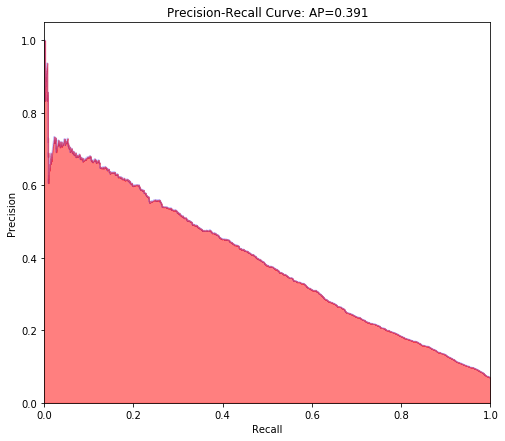

In [9]:
stack.Level_1(append_model=None)
stack.Level_2()